In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
rumma = pd.read_csv('RummaDB.csv', low_memory=False)

In [ ]:
rumma['gene'].value_counts()

gene
CDKN1A             23857
CD44               23509
TXNIP              23295
SCD                23087
CCND1              22423
                   ...  
MIR548AB               1
RNA5SP291              1
RNU6-1097P             1
ENSG00000281771        1
LSP1P1                 1
Name: count, Length: 62217, dtype: int64

In [ ]:
# rumma_up = rumma[rumma.term.str.contains('up')]
# rumma_up['Dir'] = 0
# rumma_up = rumma_up.pivot_table(index='term', columns='gene', fill_value='Dir')

/tmp/ipykernel_271394/3599492821.py:3: PerformanceWarning: The following operation may generate 5309341958 cells in the resulting pandas object.
  rumma_up = rumma_up.pivot_table(index='term', columns='gene', fill_value='Dir')


: 

In [ ]:
rumma_GSE = rumma['term']

In [184]:
archs4 = pd.read_pickle('/home/sbl/Documents/Arch4/ARCHS4_Meta_2.4.pkl')

In [ ]:
# rumma_GSE = set(rumma_GSE.values)
# rumma_GSE = list(rumma_GSE)
# rumma_GSE = [i.split('-')[0] for i in rumma_GSE]
# rumma_GSE = list(set(rumma_GSE))

#### Exploring Metadata

In [267]:
import json
with open('rummaDB_meta.json') as f:
    rummaDB_meta = json.load(f)

In [268]:
rummaDB_meta_keys = list(rummaDB_meta.keys())

In [ ]:
for i in rummaDB_meta_keys[:5]:
    print(i)
    print(rummaDB_meta[i])

GSE245402
{'titles': {'0': 'caco 2 cells nutrient depleted vehicle rep cell line wt nd', '1': 'caco 2 cells nutrient depleted bafa1 rep cell line wt nd+100nm bafilomycin a1', '2': 'caco 2 cells nutrient rich vehicle rep cell line wt nr', '3': 'caco 2 cells nutrient rich bafa1 rep cell line wt nr+100nm bafilomycin a1'}, 'samples': {'0': ['GSM7842100', 'GSM7842101', 'GSM7842102'], '1': ['GSM7842103', 'GSM7842104', 'GSM7842105'], '2': ['GSM7842094', 'GSM7842095', 'GSM7842096'], '3': ['GSM7842097', 'GSM7842098', 'GSM7842099']}, 'silhouette_score': 0.13209539876405668}
GSE253189
{'titles': {'0': 'rnvu1 18 / cell line a549 adenocarcinomic human alveolar basal epithelial cells knock', '1': 'wt cell line a549 adenocarcinomic human alveolar basal epithelial cells wild type'}, 'samples': {'0': ['GSM8016133', 'GSM8016134', 'GSM8016135'], '1': ['GSM8016130', 'GSM8016131', 'GSM8016132']}, 'silhouette_score': 0.4158263971786145}
GSE212330
{'titles': {'0': 'aza tak cell line u937 aml azacitidine + 98

#### ARSCH4 amd Rumma Integ

In [185]:
archs4 = archs4.set_index('sample')

In [ ]:
# archs4[~ archs4['characteristics_ch1'].str.contains('treatment')]['characteristics_ch1'].head(30).values
def count_meta(i):
    total_param = i.count(':')
    all_params = []
    for k in range(0,total_param):
        try:all_params.append(i.split(':')[k].split(',')[1])
        except:all_params.append(i.split(':')[k].split(',')[0])        
    return all_params

In [ ]:
all_params = [count_meta(i) for i in list(archs4['characteristics_ch1'].values)]

In [ ]:
from collections import Counter
def count_word_occurrences(list_of_lists):
    # Flatten the list of lists into a single list
    flat_list = [word for sublist in list_of_lists for word in sublist]
    # Count occurrences of each word
    word_counts = Counter(flat_list)
    return word_counts

In [ ]:
word_occurrences = count_word_occurrences(all_params)
df = pd.DataFrame()
df['Parameter'] = word_occurrences.keys()
df['Times'] = word_occurrences.values()

In [ ]:
# archs4['characteristics_ch1'].str.split(i).str[1]
archs4['characteristics_ch1'].values[0].split('treatment')[1].split(',')[0]

': siNT'

In [ ]:
# meta_values = df.sort_values(by='Times', ascending=False).head(30)['Parameter'].values
# i = meta_values[0]
archs4_rumma_meta = [] 
for i in archs4['characteristics_ch1'].values:
    data_dict = {}
    try:
        for j in meta_values:
            if i.split(j)[1].startswith(":"):
                data_dict[j] = i.split(j)[1].split(',')[0].replace(':','')
    except:pass
    archs4_rumma_meta.append(data_dict)

In [ ]:
archs4_rumma_meta = pd.DataFrame()
archs4_rumma_meta.index = archs4.index
archs4_rumma_meta['Treatment'] = archs4['characteristics_ch1'].str.split('treatment').str[1].str.split(',').str[0].str.replace(":",'').values
archs4_rumma_meta['Tissue'] = archs4['characteristics_ch1'].str.split('tissue').str[1].str.split(',').str[0].str.replace(":",'').values
archs4_rumma_meta['Cell Line'] = archs4['characteristics_ch1'].str.split('cell line').str[1].str.split(',').str[0].str.replace(":",'').values

In [ ]:
# archs4_rumma_meta["Series"] = archs4_rumma_meta.index.map(archs4['series_id'].to_dict())
# archs4_rumma_meta.to_csv('archs4_rumma_meta.to_csv')

In [ ]:
# rumma.loc[:10000]
# all_genes_rumma = rumma['gene'].values
# all_genes_rumma = Counter(all_genes_rumma)
df = pd.DataFrame()
df['Genes'] = all_genes_rumma.keys()
df['Frequency'] = all_genes_rumma.values()

/tmp/ipykernel_283522/2829821521.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Frequency'])


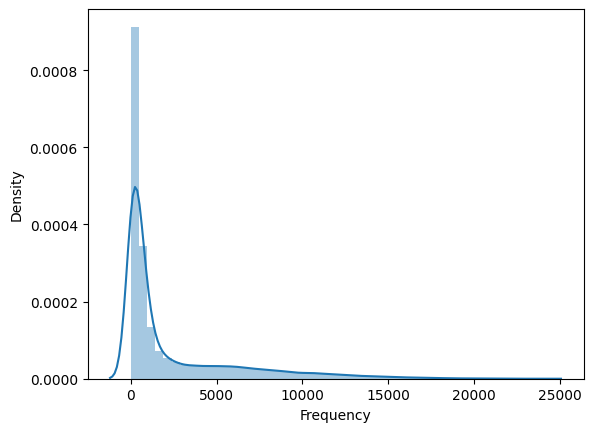

In [ ]:
sns.distplot(df['Frequency'])
plt.show()

In [ ]:
df['Frequency'].describe()

count    62217.000000
mean      2387.086439
std       3641.762106
min          1.000000
25%        157.000000
50%        610.000000
75%       3067.000000
max      23857.000000
Name: Frequency, dtype: float64

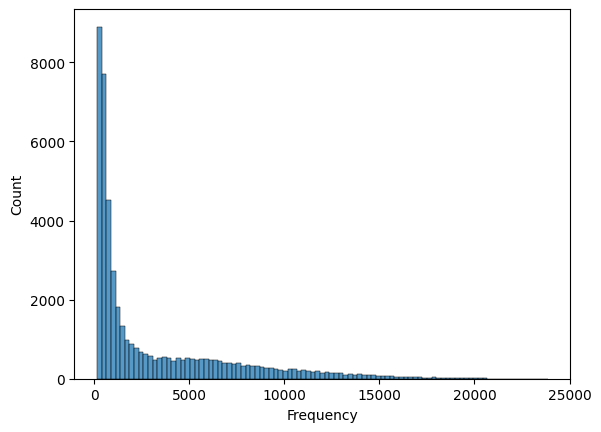

In [ ]:
# df = df[df['Frequency'] >= 150]
sns.histplot(df['Frequency'])
plt.show()

In [ ]:
rumma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517357 entries, 0 to 148517356
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   term    object
 1   gene    object
dtypes: object(2)
memory usage: 2.2+ GB


In [ ]:
rumma = rumma.astype('category')
rumma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517357 entries, 0 to 148517356
Data columns (total 2 columns):
 #   Column  Dtype   
---  ------  -----   
 0   term    category
 1   gene    category
dtypes: category(2)
memory usage: 1.1 GB


In [28]:
rumma_chunk_1 = rumma.iloc[:1000]
rumma_chunk_2 = rumma.iloc[1000:2000]

In [29]:
rumma_chunk_1['Direction'] = rumma_chunk_1['term'].apply(lambda x: 1 if x.endswith('up') else -1).values
rumma_chunk_2['Direction'] = rumma_chunk_2['term'].apply(lambda x: 1 if x.endswith('up') else -1).values

/tmp/ipykernel_314089/429875271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rumma_chunk_1['Direction'] = rumma_chunk_1['term'].apply(lambda x: 1 if x.endswith('up') else -1).values
/tmp/ipykernel_314089/429875271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rumma_chunk_2['Direction'] = rumma_chunk_2['term'].apply(lambda x: 1 if x.endswith('up') else -1).values


In [30]:
rumma_chunk_1_pivot = rumma_chunk_1.pivot_table(index='term', columns='gene', values='Direction', fill_value=0)
rumma_chunk_2_pivot = rumma_chunk_2.pivot_table(index='term', columns='gene', values='Direction', fill_value=0)

In [ ]:
pd.concat([rumma_chunk_1_pivot,rumma_chunk_2_pivot]).dropna(axis=1)

gene,NBN,RSAD1,SH3TC1,TMC6
term,,,,
GSE242199-2-vs-7-human up,1.0,1.0,1.0,1.0
"GSE211354,GSE211355-1-vs-9-human up",1.0,1.0,1.0,1.0
GSE242199-2-vs-7-human dn,0.0,0.0,0.0,0.0
GSE242199-2-vs-7-human up,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Total no of genes in a study')

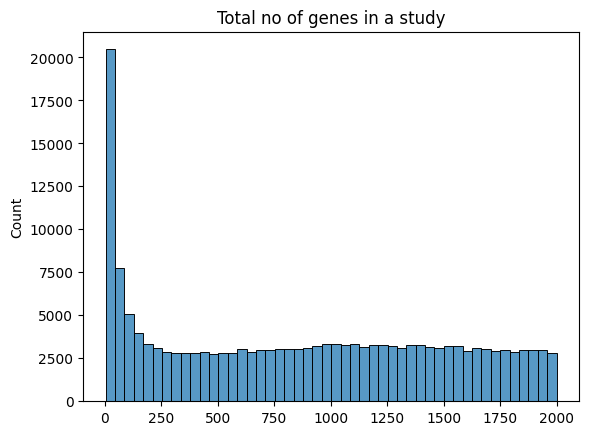

In [ ]:
# for chunks in 
sns.histplot(rumma['term'].value_counts().values)
plt.title('Total no of genes in a study')

In [ ]:
# archs4_rumma_meta = pd.read_csv('archs4_rumma_meta.csv', low_memory=False)
archs4_rumma_meta.loc[archs4_rumma_meta['Treatment'].dropna().index]['Series'].values

In [207]:
archs4_rumma_meta = pd.read_csv('archs4_rumma_meta.csv', low_memory=False)

In [ ]:
rumma_ids = list(set(rumma['term'].values))
rumma_genes = list(set(rumma['gene'].values))

In [ ]:
archs4_rumma_ids = pd.Series(rumma_ids).str.contains('|'.join(archs4_rumma_meta.loc[archs4_rumma_meta['Treatment'].dropna().index]['Series'].values), case=False)

In [ ]:
# pd.Series(rumma_ids).str.contains('|'.join(archs4_rumma_meta.loc[archs4_rumma_meta['Treatment'].dropna().index]['Series'].values), case=False)
# '|'.join(archs4_rumma_meta.loc[archs4_rumma_meta['Treatment'].dropna().index]['Series'].values)
archs4_rumma_meta.loc[archs4_rumma_meta['Treatment'].dropna().index]

,Treatment,Tissue,Cell Line
sample,,,
GSM1000981,siNT,NaN,OCI-LY1
GSM1000982,siNT,NaN,OCI-LY1
GSM1000983,siNT,NaN,OCI-LY1
GSM1000984,siBCL6,NaN,OCI-LY1
GSM1000985,siBCL6,NaN,OCI-LY1
...,...,...,...
GSM994759,DMSO,NaN,HT
GSM994760,iEZH,NaN,HT
GSM994761,DMSO,NaN,SUDHL6


In [ ]:
archs4_rumma_ids = pd.DataFrame(rumma_ids)[archs4_rumma_ids][0].values

In [ ]:
rumma_archs4 = rumma[rumma['term'].str.contains('|'.join(archs4_rumma_ids))]

In [ ]:
rumma_archs4_up = rumma_archs4[rumma_archs4['term'].str.endswith('up')]

In [ ]:
# rumma_archs4_up = rumma_archs4_up.reset_index()
# len(rumma_archs4_up) /100000
# rumma_archs4_up['Direction'] = 1
rumma_archs4_up.loc[:100000].pivot_table(index='term', columns='gene', values='Direction', fill_value=0).astype('int16')

gene,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS2,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
term,,,,,,,,,,,,,,,,,,,,,
"GSE131747,GSE233959-3-vs-7-human up",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
GSE137289-7-vs-4-human up,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"GSE157034,GSE157036-0-vs-5-human up",0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GSE159759-4-vs-1-human up,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GSE174432-6-vs-1-human up,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSE255852-7-vs-0-human up,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GSE255896-7-vs-6-human up,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GSE261040-9-vs-7-human up,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Based on chunks

In [3]:
rumma_series_counts =  rumma['term'].value_counts()
rumma_less_than_500 = list(rumma_series_counts[rumma_series_counts < 500].index)

In [ ]:
# protein_coding = pd.read_csv('/home/sbl/Documents/Arch4/Ensemble PC.csv')
# gene_conversion = pd.read_csv('/home/sbl/Documents/Chempert Database/Genes to Ensemble.csv')
set(gene_conversion['converted_alias'].values).intersection(protein_coding['gene_id'].values)
gene_conversion

,initial_alias,converted_alias,name,description,namespace
0,HTR1A,ENSG00000178394,HTR1A,5-hydroxytryptamine receptor 1A [Source:HGNC S...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE"
1,ARRB2,ENSG00000141480,ARRB2,arrestin beta 2 [Source:HGNC Symbol;Acc:HGNC:712],"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE"
2,FGFR1,ENSG00000077782,FGFR1,fibroblast growth factor receptor 1 [Source:HG...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE"
3,ARRB1,ENSG00000137486,ARRB1,arrestin beta 1 [Source:HGNC Symbol;Acc:HGNC:711],"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE"
4,GNG12,ENSG00000172380,GNG12,G protein subunit gamma 12 [Source:HGNC Symbol...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE"
...,...,...,...,...,...
11933,TRMT61A,ENSG00000166166,TRMT61A,tRNA methyltransferase 61A [Source:HGNC Symbol...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE"
11934,TRMT6,ENSG00000089195,TRMT6,tRNA methyltransferase 6 non-catalytic subunit...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE"
11935,TKT,ENSG00000163931,TKT,transketolase [Source:HGNC Symbol;Acc:HGNC:11834],"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE"
11936,BCAT1,ENSG00000060982,BCAT1,branched chain amino acid transaminase 1 [Sour...,"ENTREZGENE,GENECARDS,HGNC,UNIPROT_GN,WIKIGENE"


In [ ]:
# hg_genes = pd.read_table('hgTables_', sep=',')
pd.Series(protein_coding['gene_id'].value_counts().index).to_csv('human_protein_coding.csv', index=False)

In [ ]:
# import biomart
import mygene
mg = mygene.MyGeneInfo()
fields = ['symbol','name','entrezgene','ensemble.gene']

In [ ]:
fields

['symbol', 'name', 'entrezgene', 'ensemble.gene']

In [5]:
# rumma[rumma.term.isin([rumma_series_counts[rumma_series_counts < 500].index])]
rumma_chunk = rumma[rumma['term'].isin(list(rumma_less_than_500))]

In [17]:
['Dire'] = 1
rumma_chunk['Dire'] = rumma_chunk['Dire'].astype('int16')
rumma_chunk_piovt = rumma_chunk.pivot_table(index='term', values='Dire', columns='gene',fill_value=0).astype(int)

/tmp/ipykernel_314089/514247392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rumma_chunk['Dire'] = 1
/tmp/ipykernel_314089/514247392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rumma_chunk['Dire'] = rumma_chunk['Dire'].astype('int16')
/tmp/ipykernel_314089/514247392.py:3: PerformanceWarning: The following operation may generate 3596751796 cells in the resulting pandas object.
  rumma_chunk_piovt = rumma_chunk.pivot_table(index='term', values='Dire', columns='gene',fill_value=0).astype(int)


KeyboardInterrupt: 

In [26]:
j = 0
for i in range(0, 10000):
    k = j - 148517
    j += 148517
    print(k)
    
    break

-148517


In [112]:
n = 1000000
chunks = [rumma[i:i+n] for i in range(0,rumma.shape[0],n)]

In [103]:
def convert_to_matrix(chunk):
    chunk['Dire'] = chunk['term'].apply(lambda x: 1 if x.endswith('up') else -1).values
    chunk['term'] = chunk['term'].str.split('up|dn').str[0]
    matrix = chunk.pivot_table(index='term', values='Dire', columns='gene', fill_value=0).astype('int16')
    return matrix

In [126]:
pd.set_option('mode.chained_assignment', None)


In [127]:
i = 0
combined_matrix = pd.DataFrame()
for chunk in chunks:
    print(i)
    combined_matrix = pd.concat([combined_matrix,convert_to_matrix(chunk)]).fillna(0).astype('int16')
    i += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148


In [129]:
combined_matrix.to_pickle('RummaDB_matrix.pkl')

In [130]:
combined_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88835 entries, GSE130182-0-vs-1-human  to GSE99745-2-vs-4-human 
Columns: 62217 entries, A1BG to S100A11P6
dtypes: int16(62217)
memory usage: 10.3+ GB


#### Common betweeen Chempert and RummaDB

In [144]:
chempert_info = pd.read_csv('/home/sbl/Documents/Chempert Database/Information_for_transcriptional_responses(1).csv')
chempert_info[chempert_info['Species']=='Human']['Data_Accession'].value_counts().index

Index(['GSE70138', 'GSE92742', 'E-MTAB-798', 'GSE92466', 'GSE119283',
       'GSE119282', 'GSE30242', 'GSE119280', 'GSE9055', 'GSE119279',
       ...
       'GSE34916', 'GSE42189', 'GSE4852', 'GSE52488', 'GSE53999', 'GSE9988',
       'GSE5415', 'GSE9080', 'GSE55608', 'GSE99926'],
      dtype='object', name='Data_Accession', length=210)

In [177]:
all_ids = []
for i in combined_matrix.index.str.split('-').str[0]:
    if len(i.split(',')) > 1:
        for i in i.split(','):
            all_ids.append(i)
    else:
        all_ids.append(i)

In [178]:
set(chempert_info[chempert_info['Species']=='Human']['Data_Accession'].value_counts().index).intersection(set(all_ids))

{'GSE111717', 'GSE130381', 'GSE86577'}

In [179]:
chempert_info[chempert_info['Species']=='Human']

,Response_ID,Chemical_Compound,Chemical_ID,Data_Accession,Cell_Source,Species,Duration,Concentration,Expression_ID,Dataset_Name,Data_Accession_link
150,RID00151,Acarbose,CID51359,E-MTAB-798,Hepatocyte,Human,24h,10000uM,EID0648,human_hepatocyte_E-MTAB-798_acarbose_24h_10000...,https://www.ebi.ac.uk/arrayexpress/experiments...
151,RID00152,Acarbose,CID51359,E-MTAB-798,Hepatocyte,Human,24h,2000uM,EID0649,human_hepatocyte_E-MTAB-798_acarbose_24h_2000m...,https://www.ebi.ac.uk/arrayexpress/experiments...
152,RID00153,Acetamidofluorene,CID01777,E-MTAB-798,Hepatocyte,Human,24h,50uM,EID0650,human_hepatocyte_E-MTAB-798_acetamidofluorene_...,https://www.ebi.ac.uk/arrayexpress/experiments...
153,RID00154,Acetazolamide,CID57082,E-MTAB-798,Hepatocyte,Human,24h,120uM,EID0651,human_hepatocyte_E-MTAB-798_acetazolamide_24h_...,https://www.ebi.ac.uk/arrayexpress/experiments...
154,RID00155,Acetazolamide,CID57082,E-MTAB-798,Hepatocyte,Human,24h,600uM,EID0652,human_hepatocyte_E-MTAB-798_acetazolamide_24h_...,https://www.ebi.ac.uk/arrayexpress/experiments...
...,...,...,...,...,...,...,...,...,...,...,...
82265,RID82266,Sulforaphane,CID01496,GSE92742,HA1E,Human,24h,3.32999992371uM,EID0494,human_HA1E_GSE92742_sulforaphane_24h_3.3299999...,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...
82266,RID82267,Sulforaphane,CID01496,GSE92742,HA1E,Human,24h,1.11000001431uM,EID0494,human_HA1E_GSE92742_sulforaphane_24h_1.1100000...,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...
82267,RID82268,Sulforaphane,CID01496,GSE92742,HA1E,Human,24h,0.370000004768uM,EID0494,human_HA1E_GSE92742_sulforaphane_24h_0.3700000...,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...
82268,RID82269,Sulforaphane,CID01496,GSE92742,HA1E,Human,24h,0.119999997318uM,EID0494,human_HA1E_GSE92742_sulforaphane_24h_0.1199999...,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...


In [181]:
chempert_info[chempert_info['Species']=='Human']['Data_Accession'].value_counts()

Data_Accession
GSE70138      42978
GSE92742      34702
E-MTAB-798      339
GSE92466         48
GSE119283        36
              ...  
GSE9988           1
GSE5415           1
GSE9080           1
GSE55608          1
GSE99926          1
Name: count, Length: 210, dtype: int64

In [236]:
# chempert_drugs = pd.read_csv('/home/sbl/Documents/Chempert Database/Target of Perturbagens.csv')
chempert_drugs['Chemical Compound'].value_counts().index

Index(['Mgatp', 'Sulphate', 'Hydron;sulfate',
       'Acti mag 250 caplet; Actyform; F.m. formula; Female advantage; Formule 3000; Mag-force; Magnelis; Magnesium; Magnesium and zinc; Magnesium citramate cap; Magnesium citrate; Magnesium dietary supplement; Magnesium oxide powder heavy; Magnesium supplement; Magnesium-cl; Magnesium-tab; Magnex liq; Magnogene comprimes enrobes; Nmc magma mineral pack; Port a mins super magnesium 188; Port a mins super magnesium 375; Slow-mag; Slow-mag-tab',
       'Selenomethionine', 'Semet', 'Phosphate',
       '1,2,3-propanetriol; 1,2,3-trihydroxypropane; 2x first essence; 3 en 1 cleanser. deep cleansing; 3ce liqu id eye liner black; 3ce liqu id eye liner brown; 3d lifting; Ab duo whitening a; Ac all; Ac clear sheet mask; Ac control daily mask; Actifirm recovery toner gowoonsesang expert; Active resurgence; Active resurgence eye; Active resurgence serum; Active resurgence toner; Adipowin; Adult glycerin laxative; Advanced cell boosting ex night; Advanc

In [255]:
set([i.lstrip() for i in archs4_rumma_meta['Treatment'].dropna().values]).intersection(set([i for i in chempert_drugs['Chemical Compound'].value_counts().index]))

{'16h',
 '6-hydroxymelatonin',
 '991',
 'Abemaciclib',
 'Abexinostat',
 'Abiraterone',
 'Acalabrutinib',
 'Acetate',
 'Acetone',
 'Acrylamide',
 'Afatinib',
 'Aldoxorubicin',
 'Alisertib',
 'Alpelisib',
 'Alvocidib',
 'Amiloride',
 'Aminopterin',
 'Amonafide',
 'Amuvatinib',
 'Ang',
 'Anisomycin',
 'Antimycin',
 'Apigenin',
 'Apilimod',
 'Arachidonic acid',
 'Arecoline',
 'Arsenic',
 'Atrasentan',
 'Auxin',
 'Azeliragon',
 'Bafetinib',
 'Barasertib',
 'Baricitinib',
 'Bendamustine',
 'Benzoic acid',
 'Berberine',
 'Binimetinib',
 'Biperiden',
 'Birinapant',
 'Brigatinib',
 'Brivanib',
 'Busulfan',
 'C3',
 'C646',
 'Cabozantinib',
 'Calmidazolium',
 'Calmidazolium chloride',
 'Canertinib',
 'Cantharidin',
 'Carmofur',
 'Casin',
 'Cediranib',
 'Cerivastatin',
 'Chaetocin',
 'Chidamide',
 'Chloroxine',
 'Cilengitide',
 'Cloxyquin',
 'Cobalt',
 'Cobimetinib',
 'Combretastatin',
 'Compound 18',
 'Crenolanib',
 'Curcumin',
 'Cycloheximide',
 'Cyclopamine',
 'Dacomitinib',
 'Danusertib',
 'Di

In [263]:
archs4_rumma_meta['Treatment'].dropna().value_counts().head(50)

Treatment
 untreated                                                 13436
 DMSO                                                       7446
 none                                                       3017
 Control                                                    2997
 None                                                       2739
 Untreated                                                  2650
 treated                                                    2642
 control                                                    2441
 nucleofection                                              1730
 1microg/mL doxycycline; 24 hours                           1675
 NA                                                         1658
 time (hrs) 48                                              1545
 PDOX                                                       1441
 Placebo                                                    1413
 PALLY_48_hours_LY_48_hours                                 1299
 POST          

In [291]:
silhouette_score = []
for i in rummaDB_meta_keys:
    data_dict = {}
    data_dict['Series'] = i
    data_dict['Silhouette_Score'] = rummaDB_meta[i]['silhouette_score']
    silhouette_score.append(data_dict)
silhouette_score = pd.DataFrame(silhouette_score)

In [294]:
silhouette_score.sort_values(by='Silhouette_Score', ascending=False)

,Series,Silhouette_Score
16059,GSE61566,0.995457
7859,GSE180788,0.991515
4317,GSE185069,0.990369
3758,GSE115407,0.990203
15502,GSE107006,0.989708
...,...,...
6531,GSE71284,-2.000000
1687,GSE216036,-2.000000
6505,GSE69157,-2.000000
14866,GSE95374,-2.000000


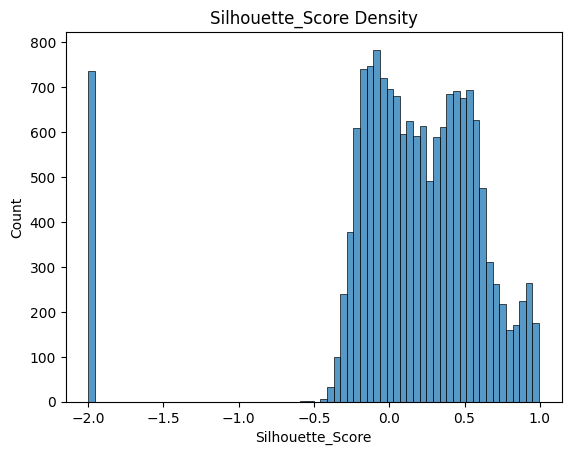

In [296]:
sns.histplot(silhouette_score['Silhouette_Score'])
plt.title('Silhouette_Score Across different')
plt.show()

#### ARCHS4 and Rumma overlap

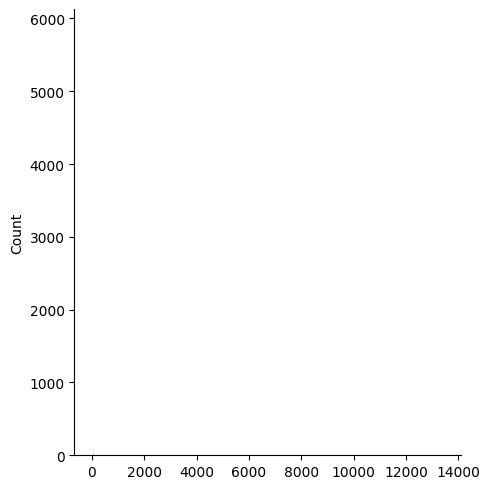

In [225]:
sns.displot(list(archs4_rumma_meta['Treatment'].value_counts().values))

In [219]:
# archs4[archs4['characteristics_ch1'].str.contains('reprogramming|time series|response|treat|perturb', case=False)]